C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Perceptron with logistic activation function has accuracy: 0.70
Perceptron with tanh activation function has accuracy: 0.95
Perceptron with relu activation function has accuracy: 0.95
Perceptron with identity activation function has accuracy: 0.95


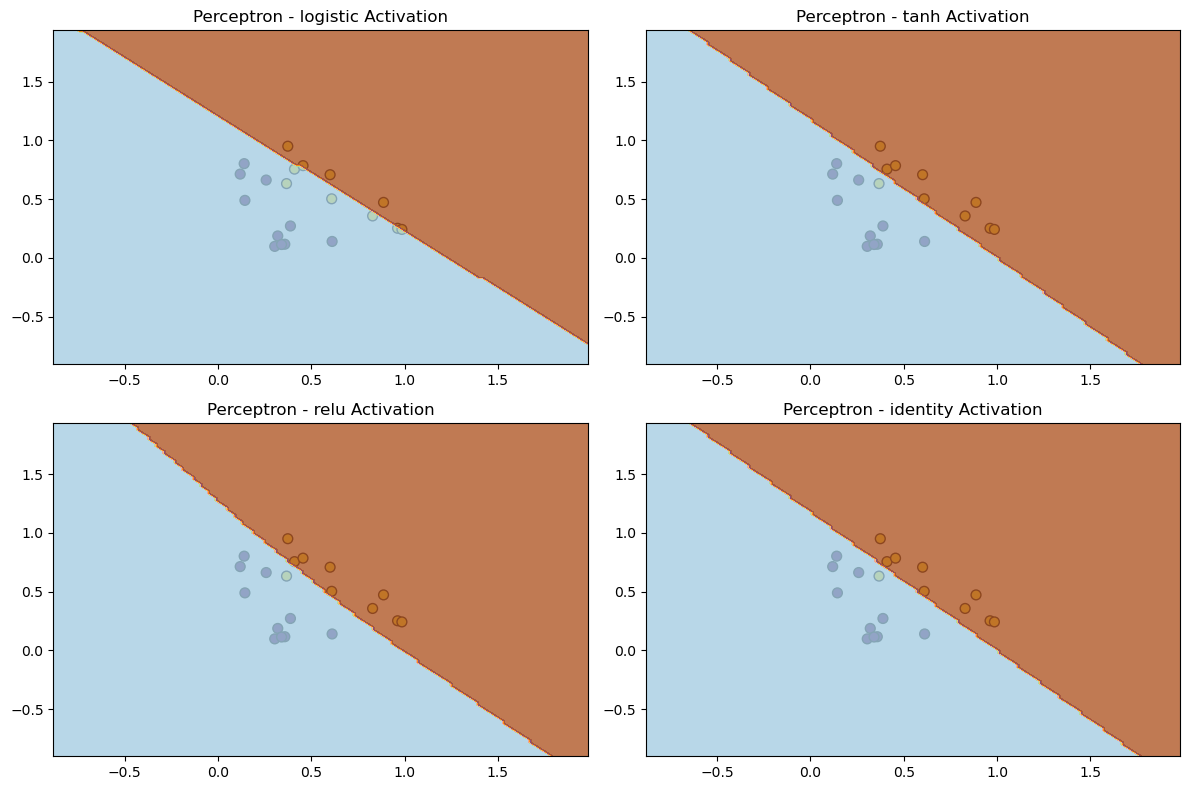

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate_perceptron(activation_function, X_train, y_train, X_test, y_test):
    # Create an MLPClassifier model with the specified activation function
    model = MLPClassifier(activation=activation_function, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return model, accuracy

# Train and evaluate perceptrons with different activation functions
perceptrons = {}
activations = ['logistic', 'tanh', 'relu', 'identity']

for activation in activations:
    perceptron, accuracy = train_and_evaluate_perceptron(activation, X_train, y_train, X_test, y_test)
    perceptrons[activation] = {'model': perceptron, 'accuracy': accuracy}

# Print the accuracies
for activation, results in perceptrons.items():
    print(f"Perceptron with {activation} activation function has accuracy: {results['accuracy']:.2f}")

# Plot decision boundaries for each perceptron
plt.figure(figsize=(12, 8))

for i, (activation, results) in enumerate(perceptrons.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=50)
    plt.title(f"Perceptron - {activation} Activation")
    
    # Plot decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = results['model'].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.tight_layout()
plt.show()
